## AQT Compile

In [ ]:
import cirq
import cirq_superstaq

In [ ]:
service = cirq_superstaq.Service(api_key="YOUR API KEY")

In [ ]:
# Do this if you need to upload new configs:
res = service.aqt_upload_configs(
    "Insert path to your Pulses.yaml", "Insert path to your Variables.yaml"
)

In [ ]:
service.aqt_save_configs("Pulses.yaml", "Variables.yaml")

## Single circuit compilation

In [13]:
qubits = cirq.LineQubit.range(8)

In [14]:
circuit1 = cirq.Circuit()
for q in qubits[4:8]:
    circuit1 += cirq.H(q)
print(circuit1)

4: ───H───

5: ───H───

6: ───H───

7: ───H───


In [ ]:
compiler_output = service.aqt_compile(circuit1)

In [16]:
print(compiler_output.circuit)

4: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───

5: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───

6: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───

7: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───


(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 0'}, xlabel='Time (us)'>)

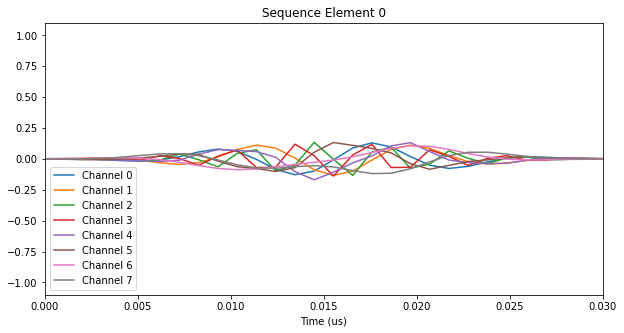

In [17]:
compiler_output.seq.plot(element=0)

## Multiple circuit compilation

In [18]:
circuit2 = cirq.Circuit()
circuit2 += cirq.SWAP(qubits[4], qubits[5])
circuit2 += cirq.H(qubits[6])
print(circuit2)

4: ───×───
      │
5: ───×───

6: ───H───


In [ ]:
compiler_output = service.aqt_compile([circuit1, circuit2])

In [20]:
print(compiler_output.circuits[0])
print()
print(compiler_output.circuits[1])

4: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───

5: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───

6: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───

7: ───Rz(0.5π)───Rx(0.5π)───Rz(0.5π)───

4: ───────────────Rx(0.5π)──────────────@───Rz(π)──────Rx(0.5π)───Rz(π)──────@───────────────Rx(0.5π)──────────────@───Rz(1.5π)───
                                        │                                    │                                     │
5: ───Rz(-0.5π)───Rx(0.5π)───Rz(0.5π)───@───Rz(0.5π)───Rx(0.5π)───Rz(1.5π)───@───Rz(-0.5π)───Rx(0.5π)───Rz(0.5π)───@───Rz(0.5π)───

6: ───Rz(0.5π)────Rx(0.5π)───Rz(0.5π)─────────────────────────────────────────────────────────────────────────────────────────────


(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 0'}, xlabel='Time (us)'>)

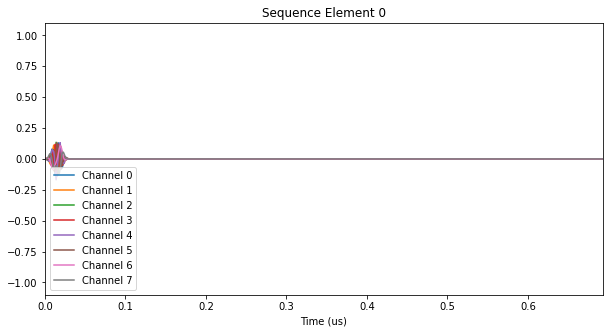

In [21]:
compiler_output.seq.plot(element=0)

(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 1'}, xlabel='Time (us)'>)

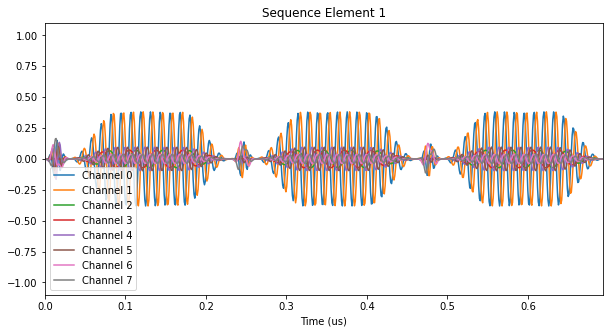

In [22]:
compiler_output.seq.plot(element=1)

## iToffoli circuit

In [9]:
circuit1 = cirq.Circuit(cirq_superstaq.ITOFFOLI(qubits[4], qubits[6], qubits[5]))
print(circuit1)

4: ───@────
      │
5: ───iX───
      │
6: ───@────


In [ ]:
compiler_output = service.aqt_compile(circuit1)

In [11]:
print(compiler_output.circuit)

4: ───@────
      │
5: ───iX───
      │
6: ───@────


(<Figure size 720x360 with 1 Axes>,
 <AxesSubplot:title={'center':'Sequence Element 0'}, xlabel='Time (us)'>)

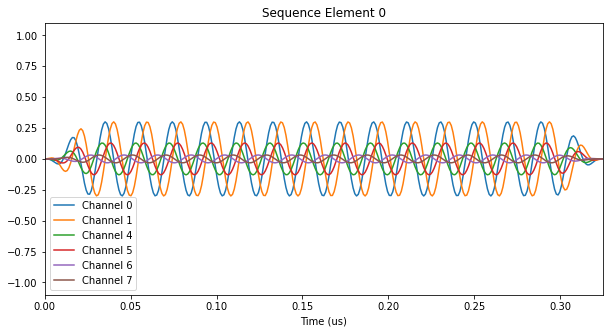

In [12]:
compiler_output.seq.plot(element=0)